In [10]:
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt



from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
import os
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scaler3d2d import preprocess_and_save_scalers,transform_data, inverse_transform_data,create_sequences

In [6]:
import MetaTrader5 as mt5
import numpy as np
import pandas as pd


In [5]:
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

trade_active = mt5.initialize()

print(trade_active)

if not trade_active:
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.4200
True
{'login': 40834668, 'trade_mode': 0, 'leverage': 1000, 'limit_orders': 50, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 10000.0, 'credit': 0.0, 'profit': 0.0, 'equity': 10000.0, 'margin': 0.0, 'margin_free': 10000.0, 'margin_level': 0.0, 'margin_so_call': 100.0, 'margin_so_so': 50.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'Demo Standard', 'server': 'Deriv-Demo', 'currency': 'USD', 'company': 'Deriv.com Limited'}


{'community_account': False, 'community_connection': False, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': True, 'build': 5328, 'maxbars': 100000000, 'codepage': 0, 'ping_last': 250411, '

In [6]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True or terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

10000.0
AI is successfully functional


In [7]:
symbols = mt5.symbols_get()
print(len(symbols))
t_symbol = []
for symbol in symbols:
    if "USD" in symbol.name:
        print("Yes ", symbol.name)
        t_symbol.append(symbol.name)

print(len(t_symbol))

790
Yes  AUDUSD
Yes  EURUSD
Yes  GBPUSD
Yes  NZDUSD
Yes  USDCAD
Yes  USDCHF
Yes  USDJPY
Yes  XAGUSD
Yes  XAUUSD
Yes  XPDUSD
Yes  XPTUSD
Yes  AAVUSD
Yes  ADAUSD
Yes  ALGUSD
Yes  APEUSD
Yes  AVAUSD
Yes  BATUSD
Yes  BCHUSD
Yes  BNBUSD
Yes  BTCUSD
Yes  DOGUSD
Yes  DOTUSD
Yes  DSHUSD
Yes  ETCUSD
Yes  ETHUSD
Yes  FILUSD
Yes  IOTUSD
Yes  LNKUSD
Yes  LTCUSD
Yes  USDCNH
Yes  USDMXN
Yes  USDNOK
Yes  USDPLN
Yes  USDSEK
Yes  USDZAR
Yes  USDHKD
Yes  USDSGD
Yes  USDTHB
Yes  AUDUSDmicro
Yes  EURUSDmicro
Yes  GBPUSDmicro
Yes  NZDUSDmicro
Yes  USDCADmicro
Yes  USDCHFmicro
Yes  USDJPYmicro
Yes  BCHUSD.conv
Yes  ETHUSD.conv
Yes  BTCUSD.conv
Yes  NEOUSD
Yes  SHBUSD
Yes  SOLUSD
Yes  TRXUSD
Yes  UNIUSD
Yes  XLMUSD
Yes  XMRUSD
Yes  XRPUSD
Yes  XTZUSD
Yes  ZECUSD
Yes  LTCUSD.conv
Yes  XALUSD
Yes  XCUUSD
Yes  XNIUSD
Yes  XPBUSD
Yes  XZNUSD
Yes  USD Basket
Yes  AUDUSD DFX 10 Index
Yes  EURUSD DFX 10 Index
Yes  GBPUSD DFX 10 Index
Yes  USDCHF DFX 10 Index
Yes  USDJPY DFX 10 Index
Yes  AUDUSD DFX 20 Index
Yes  EU

In [12]:
market = mt5.copy_rates_from_pos("GBPUSD", mt5.TIMEFRAME_M15, 0, 10000000)
display(market)
print(market.shape)
print("GBPUSD")
t_s = "GBPUSD"

data = []
for i in range(len(market)):
    data.append([market[i][1],market[i][2],market[i][3],market[i][4],market[i][5]])
df = pd.DataFrame(data, columns=["open", "high","low", "close","tick_volume"])
df.to_csv("Generated"+t_s+" dbot.csv", index=False)

array([( 737157600, 1.537  , 1.5445 , 1.529  , 1.5338 , 2781, 50, 0),
       ( 737244000, 1.5328 , 1.536  , 1.518  , 1.5225 , 2571, 50, 0),
       ( 737330400, 1.5228 , 1.5415 , 1.52   , 1.5387 , 2711, 50, 0), ...,
       (1760498100, 1.335  , 1.33515, 1.33483, 1.33506,  761,  5, 0),
       (1760499000, 1.33505, 1.33535, 1.33494, 1.33514,  761,  5, 0),
       (1760499900, 1.33514, 1.33525, 1.33505, 1.33514,  218,  5, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

(664455,)
GBPUSD


In [12]:

m_label = "GeneratedVolatility 75 Index"
train_df = pd.read_csv(m_label+" dbot.csv")
#train_df_test = train_dfs_test[n]
print(m_label)
SEQ_LEN = 240 # length of input sequence (timesteps). Typical choices: 30, 60, 90
n_rows, n_features = train_df.values.shape

X, y = create_sequences(train_df.values, SEQ_LEN, 1, 3)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)
#X1, y1 = create_sequences(train_df.values, SEQ_LEN, 5)  # X: (n_samples, SEQ_LEN, n_features), y: (n_samples, n_features)

n_samples = X.shape[0]
print(X[-1])
print(y[-1])

GeneratedVolatility 75 Index
[[59688.2  59790.3  59494.6  59503.27   149.  ]
 [59521.58 59733.42 59478.42 59578.49   150.  ]
 [59589.61 59722.4  59547.89 59622.83   150.  ]
 ...
 [57931.03 58023.52 57841.96 58009.18   150.  ]
 [58009.86 58019.74 57826.61 57961.52   150.  ]
 [57958.87 58012.51 57637.71 57709.18   150.  ]]
[57807.68]


In [13]:
X, y = preprocess_and_save_scalers(X, y)

Scaler for X saved to 'scaler_x.joblib'
Scaler for Y saved to 'scaler_y.joblib'


In [3]:
best_model = load_model("GeneratedVolatility 75 Index lstm_best.keras")

In [4]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 5)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 240, 400)         329600    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 240, 400)         961600    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 240, 400)         961600    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              961600    
 nal)                                                        

In [14]:
y_pred = best_model.predict(X[-1000:])

32/32 [==============================] - 66s 2s/step


In [15]:
_,y_test = inverse_transform_data(scaled_y=y[-1000:])
_,y_pred = inverse_transform_data(scaled_y=y_pred)
print(y_test, " comparing to ", y_pred)

# 1. Calculate the error (the gap between actual and predicted)
error = y_test - y_pred

# 2. Calculate the average gap (the bias)
average_gap = np.mean(error)
print(f"Average Gap (Bias): {average_gap:.7f}")

# 3. Add the average gap to your predictions to create a corrected version
y_pred_corrected = y_pred + average_gap

# --- Verification ---
# Let's check the first predicted value vs. the first actual value
print("\n--- Example of Correction ---")
print(f"Original Prediction: {y_pred[0, 0]:.7f}")
print(f"Corrected Prediction: {y_pred_corrected[0, 0]:.7f}")
print(f"Actual Value:        {y_test[0, 0]:.7f}")

print("R^2 value for ", m_label)
print(r2_score(y_test, y_pred_corrected))

[[67613.09]
 [67258.14]
 [67099.56]
 [67214.78]
 [67299.38]
 [67217.67]
 [67451.93]
 [67218.32]
 [67277.38]
 [67338.33]
 [67177.57]
 [67100.97]
 [67000.86]
 [66714.26]
 [66820.97]
 [66721.52]
 [66541.13]
 [66201.03]
 [65946.68]
 [65738.91]
 [65596.92]
 [65756.38]
 [65921.34]
 [66005.54]
 [66040.8 ]
 [66140.76]
 [65914.97]
 [65935.91]
 [65930.58]
 [65993.02]
 [65870.43]
 [66045.86]
 [65905.68]
 [65948.84]
 [66244.47]
 [66232.2 ]
 [66250.89]
 [66377.44]
 [66486.13]
 [66177.23]
 [65936.94]
 [65992.72]
 [65853.24]
 [66072.74]
 [65934.95]
 [66052.27]
 [65805.72]
 [65848.89]
 [65913.65]
 [65983.25]
 [66139.93]
 [66136.25]
 [66101.42]
 [66285.92]
 [66305.31]
 [66471.67]
 [66436.43]
 [66461.07]
 [66558.6 ]
 [66297.38]
 [66151.91]
 [65918.84]
 [65937.93]
 [65903.14]
 [65673.58]
 [65919.19]
 [65747.33]
 [65428.72]
 [65252.82]
 [65224.58]
 [65577.18]
 [65395.53]
 [65472.35]
 [65710.18]
 [66056.14]
 [65849.5 ]
 [65830.66]
 [65902.71]
 [65782.77]
 [65735.89]
 [65669.02]
 [65963.86]
 [65968.03]
 [65

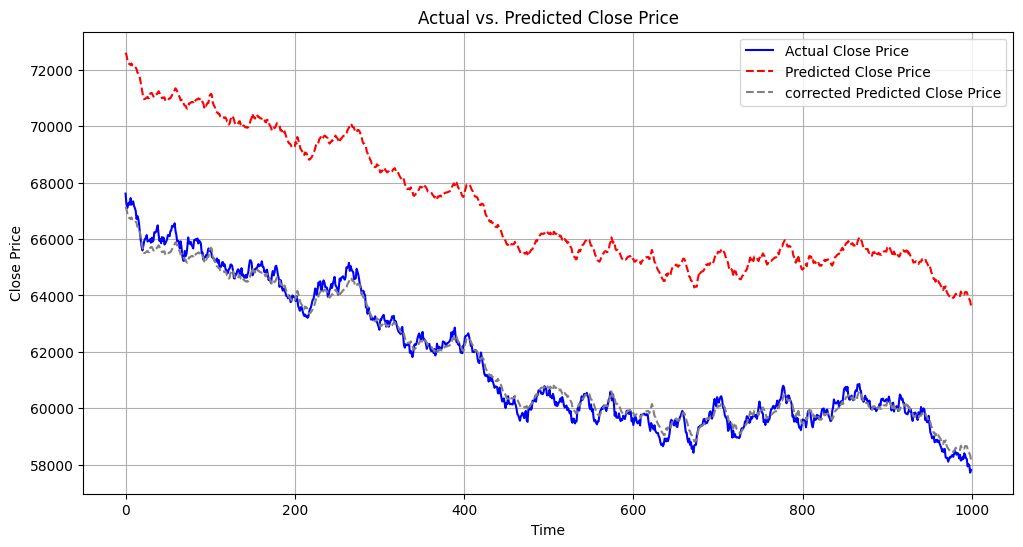

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual Close Price', color='blue')
plt.plot(y_pred[:, 0], label='Predicted Close Price', color='red', linestyle='--')
plt.plot(y_pred_corrected[:, 0], label='corrected Predicted Close Price', color='gray', linestyle='--')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()